In [1]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.support_functions import *

## Data import and manipulation

In [2]:
#Import Schizophrenia data
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/Patient')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_p = list()
for i in range(0,len(files)):
    shizophrenia_p.append(pd.read_csv(files[i]))
    
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose/control')
files = os.listdir()
files.sort(key=natural_keys)
shizophrenia_c = list()
for i in range(0,len(files)):
    shizophrenia_c.append(pd.read_csv(files[i]))
#Import demographics on Schizophrenia patients
os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project/Data/psykose')
patients_info = pd.read_csv('patients_info.csv')
#Import demographics on control group 
control_info = pd.read_csv('scores.csv')


In [7]:
#Convert strings to datetime 
for i in range(0, len(shizophrenia_c)):
    shizophrenia_c[i]['timestamp'] = pd.to_datetime(shizophrenia_c[i]['timestamp'],format='%Y-%m-%d %H:%M:%S')
    shizophrenia_c[i] = shizophrenia_c[i].drop(['date'], axis=1)

#Convert strings to datetime 
for i in range(0, len(shizophrenia_p)):
    shizophrenia_p[i]['timestamp'] = shizophrenia_p[i]['timestamp'].astype('datetime64[ns]')
    shizophrenia_p[i] = shizophrenia_p[i].drop(['date'], axis=1)


## Example plot of Actigraph time series  

Text(0.5,1,'Patient')

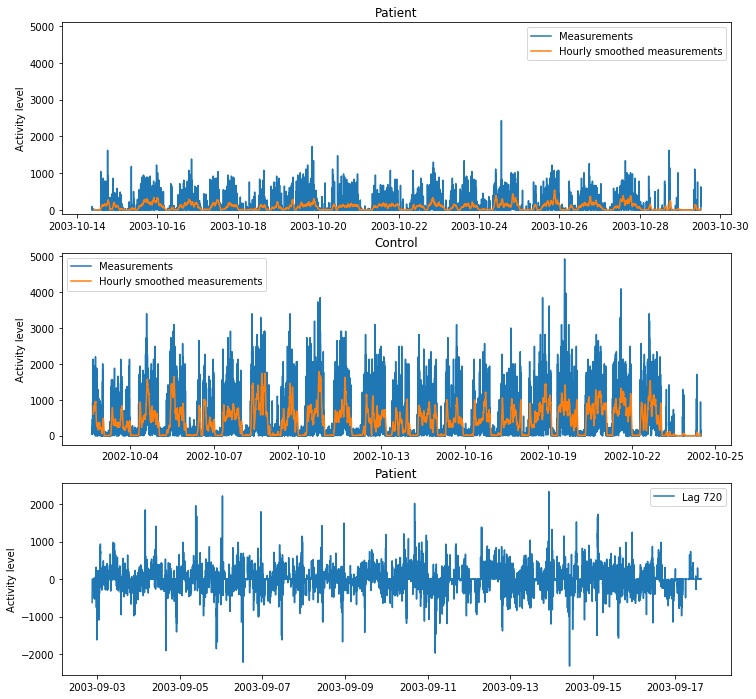

In [117]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'])
ax1.plot(shizophrenia_p[10]['timestamp'],shizophrenia_p[10]['activity'].rolling(60).mean())
ax1.set_ylabel('Activity level')
ax1.legend(['Measurements','Hourly smoothed measurements'])
ax1.set_title('Patient')
ax1.set_ylim(top=5100)

ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'])
ax2.plot(shizophrenia_c[1]['timestamp'],shizophrenia_c[1]['activity'].rolling(60).mean())
#ax2.xticks(rotation=45)
ax2.set_ylabel('Activity level')
ax2.legend(['Measurements','Hourly smoothed measurements'])
ax2.set_title('Control')
ax2.set_ylim(top=5100)

ax3.plot(shizophrenia_p[1]['timestamp'],shizophrenia_p[1]['activity'].diff(720))
#ax2.xticks(rotation=45)
ax3.set_ylabel('Activity level')
ax3.legend(['Lag 720'])
ax3.set_title('Patient')



In [9]:
#get daily data for patients
patients_daily = list()
for i in range(0,len(shizophrenia_p)):
    patients_daily.append(get_intervals(shizophrenia_p[i],intervals = 0))

# get day and night data for patients 
patients_day = list()
for i in range(0,len(shizophrenia_p)):
    patients_day.append(get_intervals(shizophrenia_p[i],intervals = 1))

patients_night = list()
for i in range(0,len(shizophrenia_p)):
    patients_night.append(get_intervals(shizophrenia_p[i],intervals = 2))

In [10]:
#get daily data for control group
control_daily = list()
for i in range(0,len(shizophrenia_c)):
    control_daily.append(get_intervals(shizophrenia_c[i],intervals = 0))

# get day and night data for patients 
control_day = list()
for i in range(0,len(shizophrenia_c)):
    control_day.append(get_intervals(shizophrenia_c[i],intervals = 1))

control_night = list()
for i in range(0,len(shizophrenia_c)):
    control_night.append(get_intervals(shizophrenia_c[i],intervals = 2))

# Analysing time series distributions of patients and control group

## Comparing histograms of activity during the day

(array([ 14.,  35.,  59.,  68.,  84.,  89., 123.,  97.,  70.,  47.,  17.,
          7.,   7.,   1.,   2.]),
 array([ 10.9375    ,  43.31944444,  75.70138889, 108.08333333,
        140.46527778, 172.84722222, 205.22916667, 237.61111111,
        269.99305556, 302.375     , 334.75694444, 367.13888889,
        399.52083333, 431.90277778, 464.28472222, 496.66666667]),
 <a list of 15 Patch objects>)

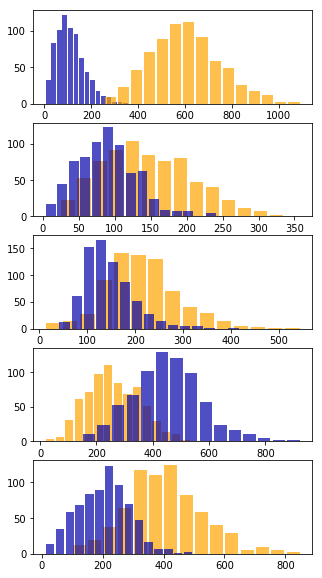

In [11]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(5,10))
ax1.hist(x=patients_day[10].mean(axis=1), bins=15, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
        
ax1.hist(x=control_day[1].mean(axis=1), bins=15, color='orange', 
                            alpha=0.7, rwidth=0.85)

ax2.hist(x=control_day[11].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax2.hist(x=patients_day[11].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax3.hist(x=control_day[5].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax3.hist(x=patients_day[5].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax4.hist(x=control_day[12].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax4.hist(x=patients_day[12].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
ax5.hist(x=control_day[14].mean(axis=1), bins=15, color='orange',
                            alpha=0.7, rwidth=0.85)
ax5.hist(x=patients_day[14].mean(axis=1), bins=15, color='#0504aa',
                                alpha=0.7, rwidth=0.85)

## Comparing boxplots of activity during the day

{'whiskers': [<matplotlib.lines.Line2D at 0x110d3c6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x110cc79b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x110d3cef0>,
 'medians': [<matplotlib.lines.Line2D at 0x110cc22b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x110cc2710>,
 'means': []}

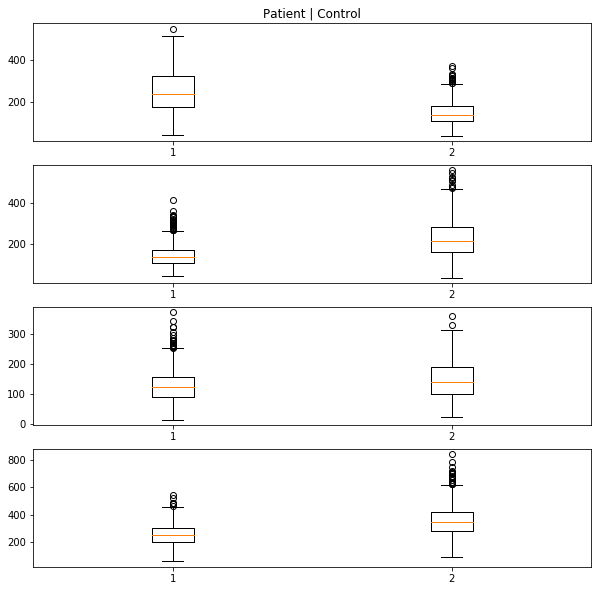

In [12]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
ax1.boxplot([patients_day[0].mean(axis=1),control_day[0].mean(axis=1)])
ax1.set_title('Patient | Control')
ax2.boxplot([patients_day[5].mean(axis=1),control_day[10].mean(axis=1)])
ax3.boxplot([patients_day[6].mean(axis=1),control_day[11].mean(axis=1)])
ax4.boxplot([patients_day[4].mean(axis=1),control_day[19].mean(axis=1)])



# Extract Features

In [137]:
# Daily and nightly mean, variance and proportions of zero
# Get the daily mean and variance
p_day_mean= list()
p_night_mean = list()
p_daily_mean = list()
p_day_var= list()
p_night_var = list()
p_daily_var = list()
p_IS = list()
#Patients 
for i in range(0, len(patients_day)):
    p_day_mean.append(np.mean(np.mean(patients_day[i], axis=1),axis=0))
    p_night_mean.append(np.mean(np.mean(patients_night[i], axis=1),axis=0))
    p_daily_mean.append(np.mean(np.mean(patients_daily[i], axis=1),axis=0))
    
    p_day_var.append(np.var(np.var(patients_day[i], axis=1),axis=0))
    p_night_var.append(np.var(np.var(patients_night[i], axis=1),axis=0))
    p_daily_var.append(np.var(np.var(patients_daily[i], axis=1),axis=0))
    
    p_IS.append(np.sqrt(np.nanmean(np.square(np.mean(patients_daily[i],axis=1).diff()))))
    
c_day_mean= list()
c_night_mean = list()
c_daily_mean = list()
c_day_var= list()
c_night_var = list()
c_daily_var = list()
c_IS = list()
#Control 
for i in range(0, len(control_day)):
    c_day_mean.append(np.mean(np.mean(control_day[i], axis=1),axis=0))
    c_night_mean.append(np.mean(np.mean(control_night[i], axis=1),axis=0))
    c_daily_mean.append(np.mean(np.mean(control_daily[i], axis=1),axis=0))
    
    c_day_var.append(np.var(np.var(control_day[i], axis=1),axis=0))
    c_night_var.append(np.var(np.var(control_night[i], axis=1),axis=0))
    c_daily_var.append(np.var(np.var(control_daily[i], axis=1),axis=0))
    
    c_IS.append(np.sqrt(np.nanmean(np.square(np.mean(control_daily[i],axis=1).diff()))))

    
#Patients propZeros 
p_propZeros = list()
for i in range(0, len(patients_day)):
    p_propZeros.append(len(shizophrenia_p[i].loc[shizophrenia_p[i]['activity']==0])/len(shizophrenia_p[i]))

#Controls propZeros 
c_propZeros = list()
for i in range(0, len(control_day)):
    c_propZeros.append(len(shizophrenia_c[i].loc[shizophrenia_c[i]['activity']==0])/len(shizophrenia_c[i]))

    
#Merge together 
patient_id = [None]*len(patients_day)
for i in range(0, len(patients_day)):
    patient_id[i] = 'patient_' + str(i)
control_id = [None]*len(control_day)    
for j in range(0, len(control_day)):
    control_id[j] = 'control_' + str(j)



In [138]:
#Create DF
column_names = ['id', 'daily_mean', 'day_mean','night_mean','day_var','night_var','propZeros','InterdailyStab']
feature_df = pd.DataFrame(columns=column_names)

feature_df['id'] = patient_id+control_id
feature_df['daily_mean'] = p_daily_mean+c_daily_mean
feature_df['day_mean'] =  p_day_mean+c_day_mean
feature_df['night_mean'] =  p_night_mean+c_night_mean
feature_df['day_var'] =  p_day_var+c_day_var
feature_df['night_var'] =  p_night_var+c_night_var
feature_df['propZeros'] =  p_propZeros+c_propZeros
feature_df['InterdailyStab'] =  p_IS+c_IS



Problem of Multicolineratiy


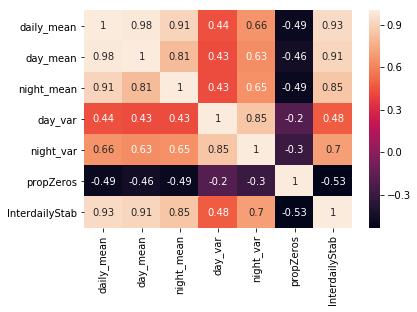

In [144]:
#Check Multicolinearity of feature matrix 
import seaborn as sns
corr = feature_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,yticklabels=corr.columns, annot=True)
print('Problem of Multicolineratiy')

## Fast Fourier Transformation

ValueError: not enough values to unpack (expected 3, got 2)

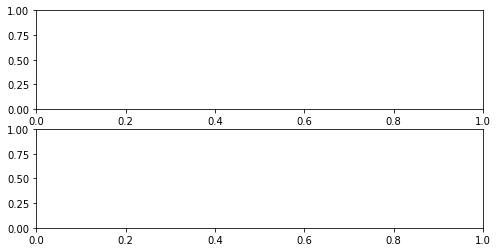

In [204]:
from scipy.fftpack import fft, fftfreq
trans = fft(shizophrenia_p[1]['activity'])
trans = np.abs(trans) ** 2
fftfreq1 = fftfreq(len(trans), 1. / 1440)
fftfreq2 = fftfreq(len(trans), 1. / 60)

i = fftfreq1  > 0
i = fftfreq2 > 0
fig, ax1,ax2 = plt.subplots(2,1 , figsize=(8, 4))
ax1.plot(fftfreq1[i], np.log(trans[i]))
ax2.plot(fftfreq2[i], np.log(trans[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('PSD (dB)')

In [186]:
len(trans)

21946

In [199]:
fftfreq1[i]

IndexError: arrays used as indices must be of integer (or boolean) type